**PARSHAV SHARMA**

**ASSIGNMENT OF ZEOTAP**

Task 3: Customer Segmentation / Clustering

Perform customer segmentation using clustering techniques. Use both profile information

(from Customers.csv) and transaction information (from Transactions.csv).

● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)

● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).

● Visualise your clusters using relevant plots.


Deliverables:

● A report on your clustering results, including:

 - The number of clusters formed.

 - DB Index value.

- Other relevant clustering metrics.

● A Jupyter Notebook/Python script containing your clustering code

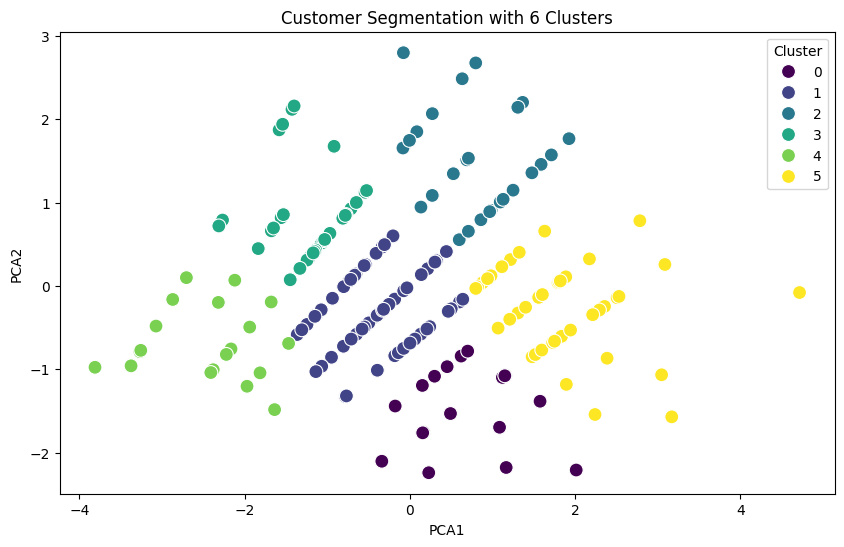

Optimal Number of Clusters: 6
Davies-Bouldin Index (DB Index): 0.8378494162847354
Silhouette Score: 0.37090854600877066
Calinski-Harabasz Index: 146.2873862120054


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')


# Merge datasets and create transaction summary
transactions_summary = transactions_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Merge transaction summary with customer data
customer_data = customers_df.merge(transactions_summary, on='CustomerID', how='left')
customer_data.fillna(0, inplace=True)

# Select features for clustering
features = ['total_spent', 'total_transactions', 'avg_transaction_value']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])

# Evaluate clustering with KMeans for clusters from 2 to 10
db_scores = []
silhouette_scores = []
calinski_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    db_index = davies_bouldin_score(scaled_features, labels)
    silhouette_avg = silhouette_score(scaled_features, labels)
    calinski_avg = calinski_harabasz_score(scaled_features, labels)

    db_scores.append((k, db_index))
    silhouette_scores.append((k, silhouette_avg))
    calinski_scores.append((k, calinski_avg))

# Select the optimal number of clusters (minimum DB Index)
optimal_k = min(db_scores, key=lambda x: x[1])[0]

# Perform final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_data['PCA1'] = pca_features[:, 0]
customer_data['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='viridis', s=100
)
plt.title(f'Customer Segmentation with {optimal_k} Clusters')
plt.legend(title='Cluster', loc='best')
plt.show()

# Print evaluation metrics for the optimal cluster count
final_labels = customer_data['Cluster']
db_index = davies_bouldin_score(scaled_features, final_labels)
silhouette_avg = silhouette_score(scaled_features, final_labels)
calinski_avg = calinski_harabasz_score(scaled_features, final_labels)

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index (DB Index): {db_index}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_avg}")
